In [137]:
from sklearn import datasets
digits = datasets.load_digits()
import pandas as pd

In [138]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [139]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [140]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [141]:
df['target'] = digits.target

In [142]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [143]:
X = df.drop('target', axis = 1).values  # .values requires else error
y = df.target

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y ,train_size = 0.8)


In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  #3-5 n_neighbors works best
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [146]:
knn.score(X_test,y_test)

0.9944444444444445

In [147]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 25]], dtype=int64)

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

Text(58.222222222222214, 0.5, 'Truth')

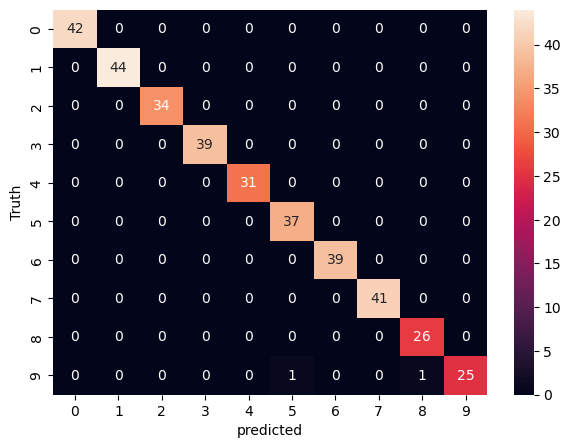

In [149]:
plt.figure(figsize= (7,5))
sn.heatmap(cm , annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        31
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        41
           8       0.96      1.00      0.98        26
           9       1.00      0.93      0.96        27

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

